In [12]:
!pip install pandas matplotlib seaborn scikit-learn


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   Produ

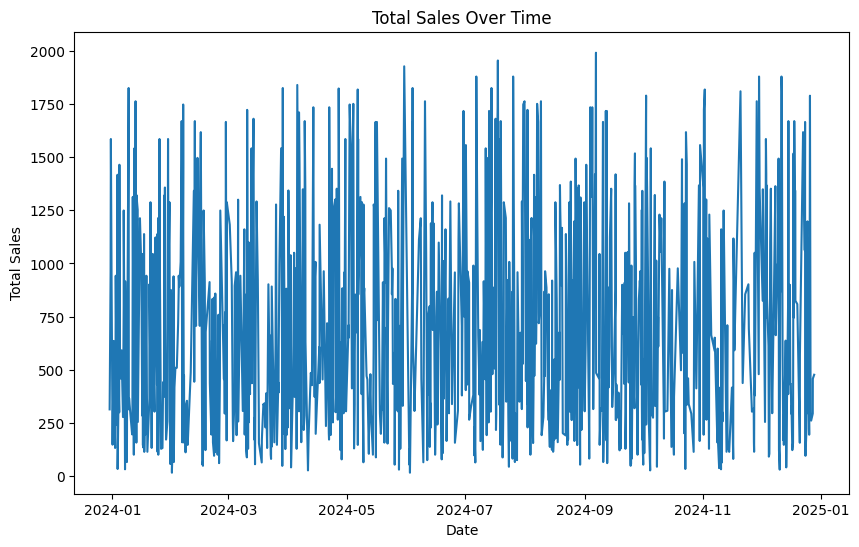

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('/content/Transaction.csv')

print(customers.head(), customers.info())
print(products.head(), products.info())
print(transactions.head(), transactions.info())

customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

merged = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

top_products = merged.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(5)
print("Top 5 Selling Products:\n", top_products)

sales_by_date = merged.groupby('TransactionDate')['TotalValue'].sum()
plt.figure(figsize=(10, 6))
plt.plot(sales_by_date.index, sales_by_date.values)
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

merged.to_csv('merged_dataset.csv', index=False)


In [14]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

customer_features = merged.groupby('CustomerID').agg({
    'Quantity': 'sum',
    'TotalValue': 'sum',
    'Category': lambda x: ' '.join(x)
}).reset_index()

category_encoded = pd.get_dummies(customer_features['Category'])
customer_features = pd.concat([customer_features, category_encoded], axis=1).drop(columns=['Category'])


features = customer_features.drop(columns=['CustomerID'])
similarity_matrix = cosine_similarity(features)

lookalike = {}
for i, customer_id in enumerate(customer_features['CustomerID']):
    similar_indices = np.argsort(similarity_matrix[i])[::-1][1:4]
    similar_customers = [(customer_features.iloc[j]['CustomerID'], similarity_matrix[i][j]) for j in similar_indices]
    lookalike[customer_id] = similar_customers


lookalike_data = []
for cust_id, similarities in lookalike.items():
    row = [cust_id] + [item for sublist in similarities for item in sublist]
    lookalike_data.append(row)

columns = ['CustomerID', 'Lookalike1', 'Score1', 'Lookalike2', 'Score2', 'Lookalike3', 'Score3']
lookalike_df = pd.DataFrame(lookalike_data, columns=columns)
lookalike_df.to_csv('Vaishnavi_GaneshChaudhari_Lookalike.csv', index=False)


Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price_x', 'CustomerName', 'Region',
       'SignupDate', 'ProductName', 'Category', 'Price_y'],
      dtype='object')
Davies-Bouldin Index: 0.7212797181816303


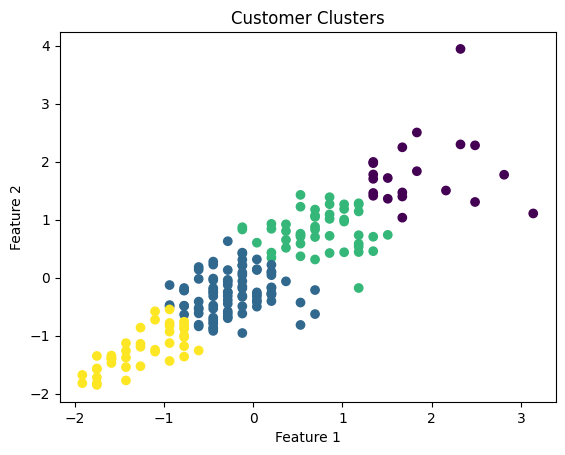

In [15]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt


merged = pd.read_csv('merged_dataset.csv')
print(merged.columns)
merged = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

features = merged.groupby('CustomerID').agg({
    'Quantity': 'sum',
    'TotalValue': 'sum'
}).reset_index()


scaler = StandardScaler()
scaled_features = scaler.fit_transform(features.drop(columns=['CustomerID']))


kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

features['Cluster'] = clusters

db_index = davies_bouldin_score(scaled_features, clusters)
print(f'Davies-Bouldin Index: {db_index}')

plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=clusters, cmap='viridis')
plt.title('Customer Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


features.to_csv('Vaishnavi_GaneshChaudhari_Clustering.csv', index=False)


Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price_x', 'CustomerName', 'Region',
       'SignupDate', 'ProductName', 'Category', 'Price_y'],
      dtype='object')
Davies-Bouldin Index: 0.7212797181816303


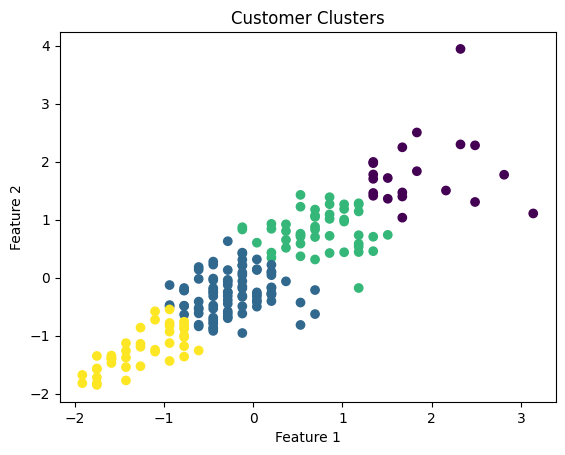

In [16]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt

print(merged.columns)


features = merged.groupby('CustomerID').agg({
    'Quantity': 'sum',
    'TotalValue': 'sum'
}).reset_index()


scaler = StandardScaler()
scaled_features = scaler.fit_transform(features.drop(columns=['CustomerID']))

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

features['Cluster'] = clusters

db_index = davies_bouldin_score(scaled_features, clusters)
print(f'Davies-Bouldin Index: {db_index}')

plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=clusters, cmap='viridis')
plt.title('Customer Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

features.to_csv('Vaishnavi_GaneshChaudhari_Clustering.csv', index=False)
